# Statistical Thinking in Python (Part 2)

## 1. Parameter estimation by optimization

### 1.1 Optimal Parameters
**Optimal parameters**  
* Parameter values that bring the model in closest agreement with the data  

**Packages to do statistical inference**  
* scipy.stats
* statsmodels
* hacker stats with numpy

#### How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If we assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. The Exponential distribution has a single parameter, which we will call `tau` (τ), the typical interval time. The value of the parameter `tau` (τ) that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

We will compute the value of this parameter from the data. Then, we will use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the `tau` (τ) we found and plot the histogram as an approximation to the PDF.

In [60]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [61]:
# Data
nohitter_times = np.asarray([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])
print(type(nohitter_times))

<class 'numpy.ndarray'>


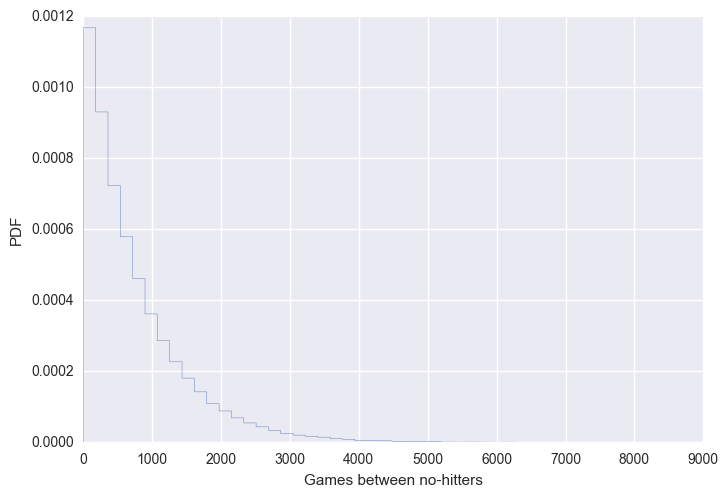

In [62]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
plt.hist(inter_nohitter_time, bins=50, normed=True, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

#### Do the data follow our story?
We have modeled no-hitters using an Exponential distribution. We will create an ECDF of the real data and overlay the theoretical CDF with the ECDF from the data. This helps us verify that the Exponential distribution describes the observed data.

We will reuse the ecdf() function created in Part 1.

In [63]:
# Computing the ecdf
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

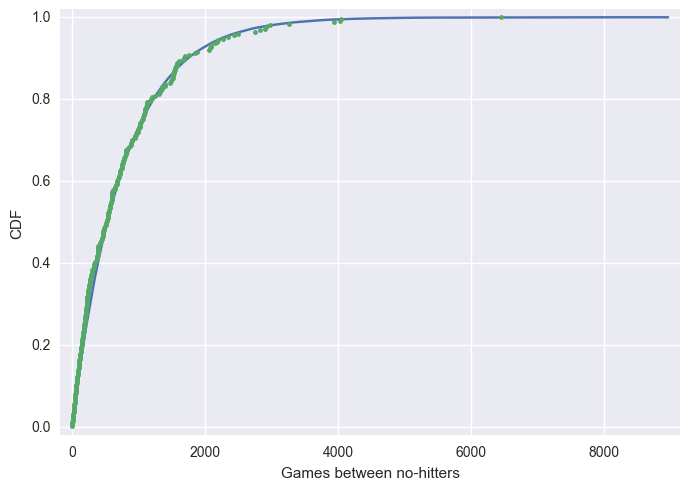

In [64]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

#### How is this parameter optimal?
Now we will sample out of an exponential distribution with `tau` (τ) twice as large as the optimal `tau` (τ). We will do it again for `tau` (τ) half as large. We will make CDFs of these samples and overlay them with our data. We can see that they do not reproduce the data as well. Thus, the `tau` (τ) we computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

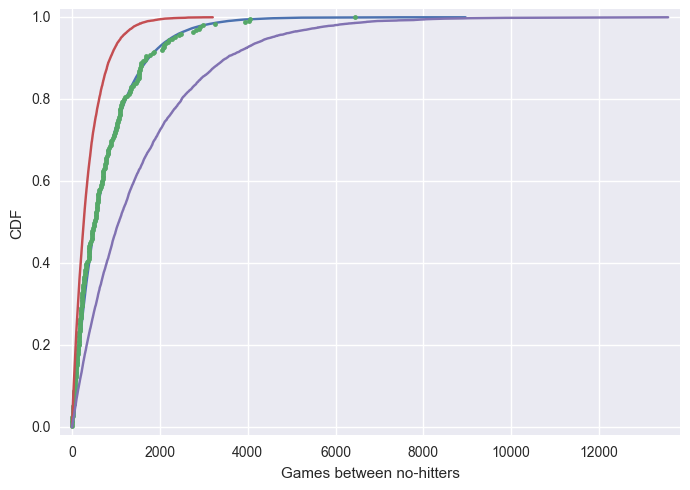

In [65]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

The value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

### 1.2 Linear Regression By Least Squares
Sometimes two variables are related. We might suspect some underlying function gives the data its shape. Often times a linear function is appropriate to describe data. The parameters of the function are the slope and intercept. The slope sets how steep the line is and the intercept sets where the line crosses the y-axis. We want to select the slop and intercept such that the data points collectively lie as close as possible to the line. 

**Residuals**  
The vertical distance between a data point and the line is called a residual.  

**Least squares**  
We define the line that is closest to the data to be the line for which the sum of the squares of all residuals is minimal.  
* The process of finding the parameters for which the sum of the squares of the residuals is minimum.  

**Least squares with `np.polyfit()`**  
There are many algorithms to do this in practice. The np.polyfit() function performs least squares analysis with polynomial functions. A linear function is a first degree polynomial.  
> `slope, intercept = np.polyfit(x, y, n)`  
> the first two arguments are the x and y data  
> the third argument is the degree of the polynomial you wish to fit (1 for linear functions)  
> returns the slope and intercept of the best fit line  


#### EDA of literacy/fertility data
We will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

Let's do some EDA ahead of our analysis. To this end, we will plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

In [66]:
# Data
illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])
fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

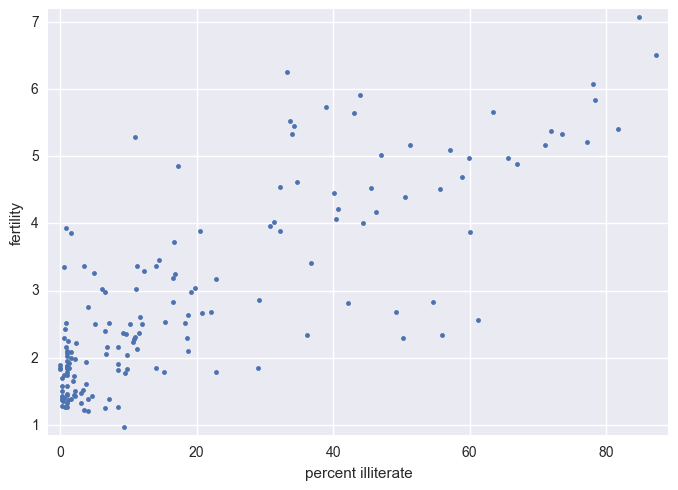

0.804132402682
0.804132402682


In [67]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Function for Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

# Alternatively use the pearsonr function from SciPy
from scipy.stats.stats import pearsonr
print(pearsonr(illiteracy, fertility)[0])


You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

#### Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, `f=ai+b`, where `a` is the slope and `b` is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.

We will plot the data and the best fit line. 

We will print out the slope and intercept.

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


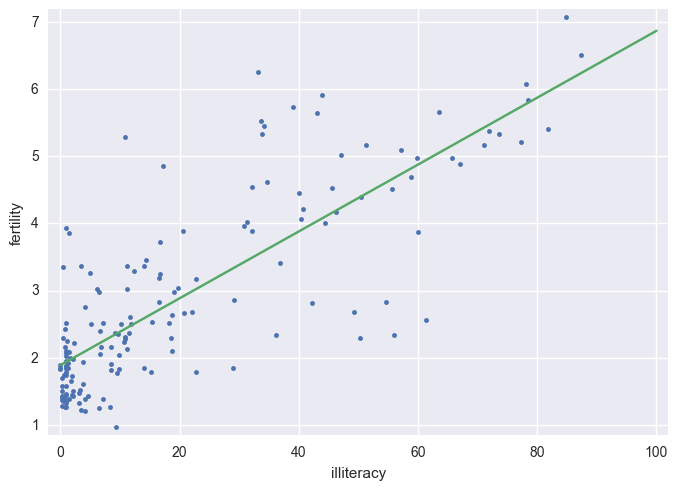

In [68]:
# Plot the illiteracy rate versus fertility
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
plt.plot(x, y)
plt.xlabel('illiteracy')
plt.ylabel('fertility')

# Draw the plot
plt.show()


#### How is it optimal?
The function `np.polyfit()` that we used to get the regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). Now we will plot the function that is being optimized, the RSS, versus the slope parameter `a`. To do this, we fix the intercept to be what we found in the optimization. Then, plot the RSS vs. the slope to see where it is minimal.

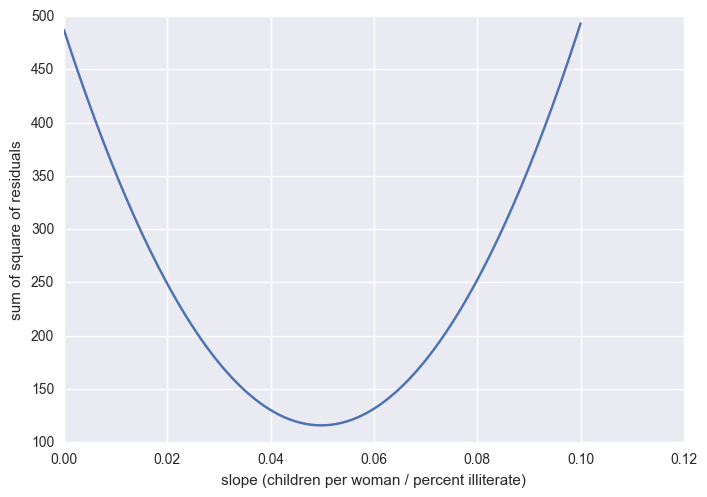

In [69]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value we got when performing the regression.

### 1.3 The Importance Of EDA: Anscombe's Quartet
**Anscombe's quartet**  
In 1973, statistician Francis Anscombe published a paper that contained 4 fictitious x/y datasets. He uses these datasets to make an important point. The average x values for all 4 datasets is the same. The average y values for all 4 datasets is the same. If we perform linear regression on each dataset, they all have the same line. The sum of the squares of the residuals are all same as well.

**Look before your leap!**  
* Do graphical EDA first before you start computing and making judgments about your data.  


#### Linear regression on appropriate Anscombe data
For practice, let's perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [70]:
# Anscombe data
x_ans = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y_ans = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
        10.84,   4.82,   5.68])

0.500090909091 3.00009090909


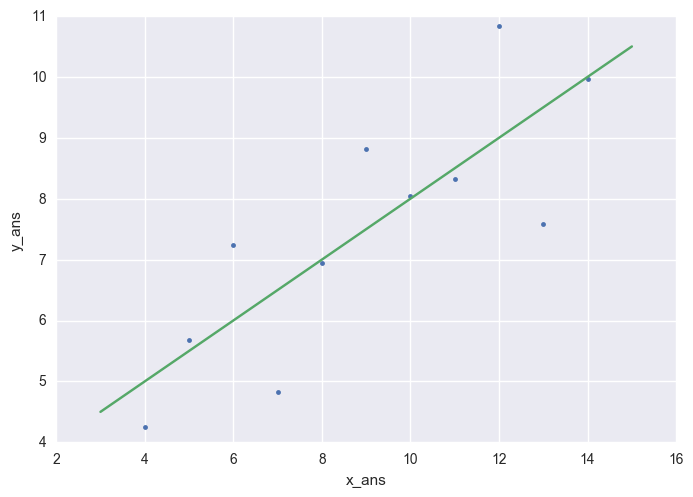

In [71]:
# Perform linear regression: a, b
a, b = np.polyfit(x_ans, y_ans, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x_ans, y_ans, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x_ans')
plt.ylabel('y_ans')

# Show the plot
plt.show()

#### Linear regression on all Anscombe data
Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 are the x and y values for the second Anscombe data set.

In [72]:
# Data
anscombe_x = np.array([np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([  8.,   8.,   8.,   8.,   8.,   8.,   8.,  19.,   8.,   8.,   8.])])

anscombe_y = np.array([np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26, 10.84,   4.82,   5.68]),
 np.array([ 9.14,  8.14,  8.74,  8.77,  9.26,  8.1 ,  6.13,  3.1 ,  9.13, 7.26,  4.74]),
 np.array([  7.46,   6.77,  12.74,   7.11,   7.81,   8.84,   6.08,   5.39, 8.15,   6.42,   5.73]),
 np.array([  6.58,   5.76,   7.71,   8.84,   8.47,   7.04,   5.25,  12.5 , 5.56,   7.91,   6.89])])

In [73]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.500090909091 intercept: 3.00009090909
slope: 0.5 intercept: 3.00090909091
slope: 0.499727272727 intercept: 3.00245454545
slope: 0.499909090909 intercept: 3.00172727273


 They all have the same slope and intercept.

## 2. Bootstrap confidence intervals


### 2.1 Generating Bootstrap Replicates
In inference problems it is rare that we are interested in a single data acquisition. We want to say something more general. 

Statistically speaking, we want to know what we would observe if we did an experiment over and over again an infinite number of times. Unfortunately, actually repeating the experiment lots and lots of times is just not possible. But as hackers we can simulate getting the data again.

**Resampling an array**  
The idea is that we resample the data we have and recompute the summary statistics of interest. To resample an array of measurements, we randomly select one entry and store it. Importantly, we don't delete it from the original array. This is called sampling with replacement. We do this for the total number of measurements. We then have a resampled array of data. Using this new resampled array, we compute the summary statistics and store the results.
We can use these results to plot an ECDF, for example, to get a picture of the probability distribution describing the summary statistic. 

**Bootstrapping**  
This process is an example of bootstrapping.  
* The use of resampled data to perform statistical inference.  

**Bootstrap sample**  
* A resampled array of the data.  

**Bootstrap replicate**  
* A statistic computed from a resampled array.

**Resampling engine: `np.random.choice()`**  
This function provides the functionality to perform the resampling.
> `np.random.choice([1, 2, 3, 4, 5], size=5)`  
> argument = array of measurements  
> size keyword argument specifies how many samples we want to take out of the array  

**Computing a bootstrap replicate**  
We can pick whatever summary statictic we like using the bootstrapped sample.  

#### Visualizing bootstrap samples
We will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array `rainfall` in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, we can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [74]:
# Data
rainfall = np.array(
[  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ]
)

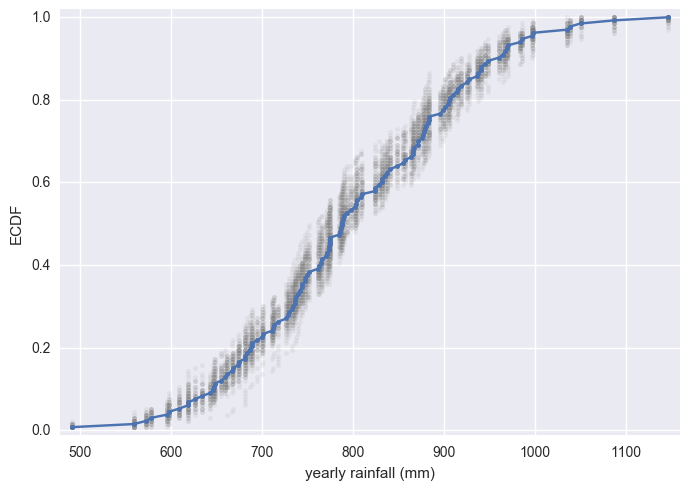

In [75]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

### 2.2 Bootstrap Confidence Intervals
Since we will repeat the replicates over and over again, we can write a function to replicate a bootstrap replicate.

**Bootstrap replicate function**  
> `def bootstrap_replicate_1d(data, func):`  
> `   """ Generate bootstrap replicate of 1D data """`  
> `    bs_sample = np.random.choice(data, len(data))`   
> `    return func(bs_sample)`  
> we pass in the data  
> and also a function that computes the statistic of interest  

Generating a replicate takes two steps. First, we choose entries out of the data array so that the bootstrap sample has the same number of entries as the original data. Then we compute the statistic using the specified function. 

**Many bootstrap replciates**  
To do this over and over again, we use a `for` loop. First we have to initialize an array to store the bootstrap replicates. We will make 10000 replicates. We will call a for loop to store the replicates in the array.
> `bs_replicates = np.empty(10000)`  
> `for i in range(10000):`  
>      `bs_replicates(i) = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)`  

**Plotting a histogram of bootstrap replicates**  
Now that we have the replicates, we can make an histogram to see what we might expect to get for the mean of repeated measurements of the speed of light.  
> `plt.hist(bs_replicates, bins=30, normed=True)`    

**Bootstrap estimate of the mean**  
So we have computed the approximate PDF of the mean speed of light we would expect to get if we perform the measurements again.  

**Confidence interval of the statistic**  
It is useful to summarize this result without having to resort to a graphical method like a histogram. To do this, we will compute the 95% confidence interval of the mean. The p% confidence interval is defined as follows:
* If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.  

**Bootstrap confidence interval**  
We get the 2.5 and 97.5 percentiles to get the 95% confidence intervals.  
> `conf_int = np.percentile(bs_replicates, [2.5, 97.5])`  

#### Generating many bootstrap replicates
First we will write the function `bootstrap_replicate_1d()`. Next we will write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. This function will come in handy for us again and again as we compute confidence intervals and later when we do hypothesis tests.

In [76]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#### Bootstrap replicates of the mean and the SEM
In this exercise,we will compute a bootstrap estimate of the probability distribution function of the mean annual rainfall at the Sheffield Weather Station. We are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. We will plot the PDF as a histogram, and we will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, we get this same result without the need to derive it, but we will verify this result from our bootstrap replicates.

10.5105491505
10.3587641996


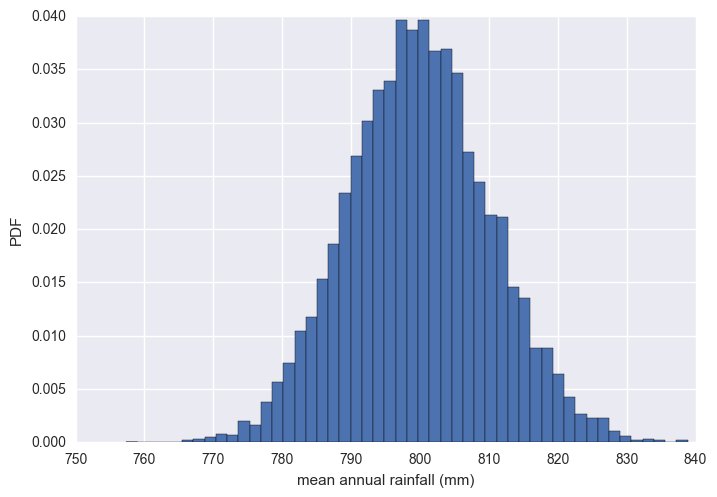

In [77]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
plt.hist(bs_replicates, bins=50, normed=True)
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

#### Confidence intervals of rainfall data
A confidence interval gives bounds on the range of parameter values you might expect to get if we repeated our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can just take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the `np.percentile()` function.

Let's use the bootstrap replicates we generated to compute the 95% confidence interval.

In [78]:
conf_intervals = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_intervals)                               

[ 779.96900376  820.62793233]


#### Bootstrap replicates of other statistics
We saw that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, we will generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

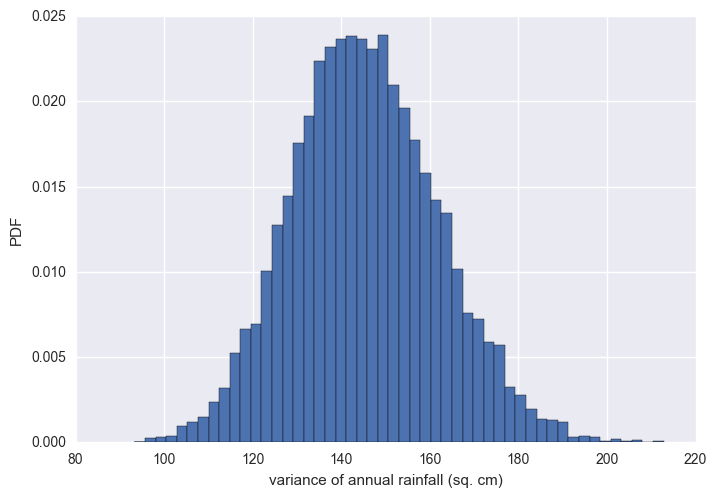

In [79]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This is not normally distributed, as it has a longer tail to the right. 

#### Confidence interval on the rate of no-hitters
Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter ττ. Plot a histogram of your replicates and report a 95% confidence interval.

95% confidence interval = [ 663.65229084  869.79741036] games


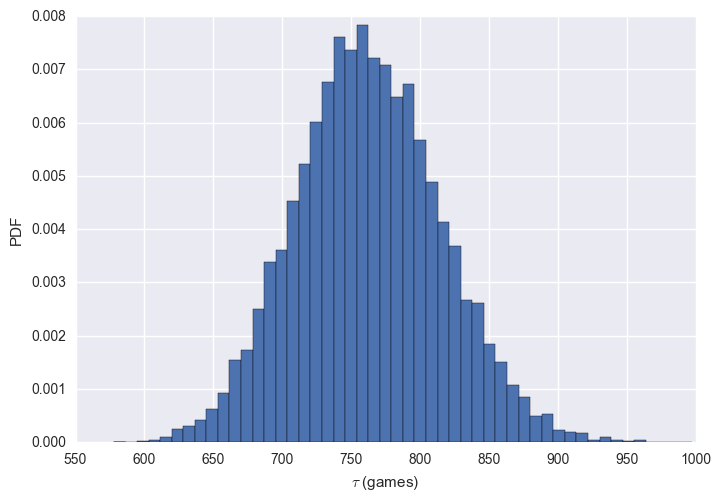

In [80]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
plt.hist(bs_replicates, bins=50, normed=True)
plt.xlabel(r'$\tau$ (games)')
plt.ylabel('PDF')

# Show the plot
plt.show()

This gives an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

### 2.3 Pairs Bootstrap

**Nonparametric inference**  
* Make no assumptions about the model or probability distribution underlying the data i.e. the estimates were done using the data alone.  

**Pairs bootstrap for linear regression**  
* Resample data in pairs  
* Compute slope and intercept from resampled data  
* Each slope and intercept is a bootstrap replicate  
* Compute confidence intervals from percentiles of bootstrap replicates  

**Generating a pairs bootstrap sample**  
We will generate the indices of the datapoints. We then sample the indices. The bootstrap sample is generated by slicing out the respective values from the original data arrays.  
> `inds = np.arange(len(total_votes))`  
> `bs_inds = np.random.choice(inds, len(inds))`  
> `bs_total_votes = total_votes[bs_inds]`  
> `bs_dem_share = dem_share[bs_inds]`  

**Computing a pairs bootstrap replicate**  
With these in hand, we can perform a linear regression using `np.polyfit()` on the pairs bootstrap sample to get a pairs bootstrap replicate.  
> `bs_slope, bs_intercept = np.polyfit(bs_total_shares, bs_dem_share, 1)`  
> `np.polyfit(total_votes, dem_share, 1) # fit of original`  

Getting the optimal parameter values is the first step. Now we are going to find out how that parameter is likely to change upon repeated measurements.

#### A function to do pairs bootstrap
Pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, we will write a function to perform pairs bootstrap on a set of x,y data.

In [81]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

#### Pairs bootstrap of literacy/fertility data
Using the function we just wrote, we will perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. We will report the 95% confidence interval of the slope.

[ 0.04389859  0.05528877]


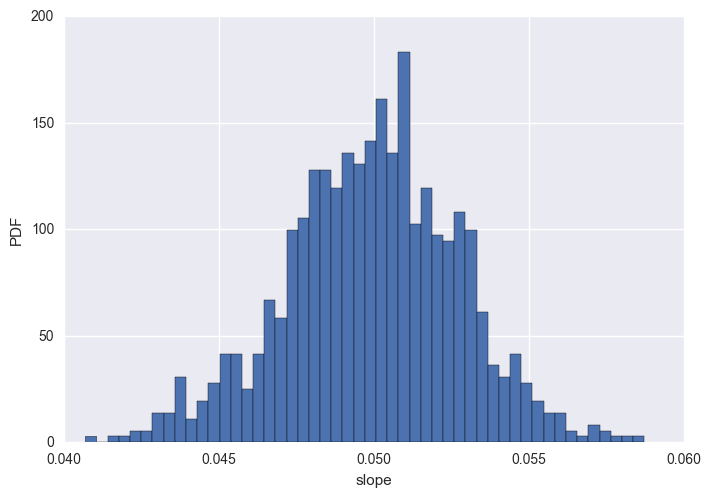

In [82]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
plt.hist(bs_slope_reps, bins=50, normed=True)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

#### Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line we would get from each bootstrap replicate of the slope and intercept. Let's do this for the first 100 of our bootstrap replicates of the slope and intercept.

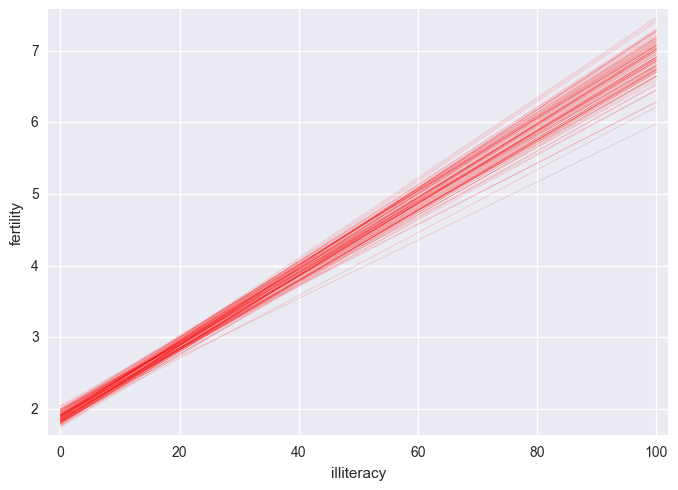

In [83]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
#_ = plt.show()

# Label axes, set the margins, and show the plot
plt.xlabel('illiteracy')
plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## 3. Introduction to hypothesis testing

### 3.1 Formulating And Simulating A Hypothesis
How do we assess how reasonable it is that our observed data is actually described by our model? This is the realm of hypotheseis testing.
Example: I hypothesize that county level voting in OH and PA have identical probability distributions.

**Hypothesis testing**  
* Assessment of how reasonable the observed data is assuming a hypothesis is true  

**Null hypothesis**  
* Another name for the hypothesis you are testing  

**ECDFs of swing state election results**  
We may start by plotting the ECDFs of the county level votes. We can't really draw a conclusion here.  

**Percent vote for Obama**  
We could just compare some summary statistic. Again, this is a tough call. Eyeballing the data is not enough.  

**Simulating the hypothesis**  
To resolve this issue, we can simulate what the data would look like if the county level voting trends in the two states were identically distributed. We can do this by putting the demographic share of the vote in all of PA's 67 counties and OH's 88 counties together. We then ignore what state they belong to. Next, we randomly scramble the ordering of the counties. We then relabel the first 67 to be "PA" and the remaining ones to be "OH". So we just redid the elections as if there was no difference between PA and OH.  

**Permutation**  
This technique of reordering the order of an array is called permutation.  
* Random reordering of entries in an array  

It is at the heart of simulating a null hypothesis where we asssume two quantities are identically distributed.  

**Generating a permutation sample**  
> `import numpy as np`  
> `dem_share_both = np.concatenate((dem_share_PA, dem_share, OH))`  
> _argument = tuple of the arrays that you wish to concatenate_  
> `dem_share_perm = np.random.permutation(dem_share_both)`  
> `perm_sample_PA = dem_share_perm[:len(dem_share_PA)]`  
> `perm_sample_OH = dem_share_perm[len(dem_share_PA):]`  
> _these sample are called permutation samples_  

#### Generating a permutation sample
Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, we will write a function to generate a permutation sample from two data sets.

A permutation sample of two arrays having respectively `n1` and `n2` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first `n1` entries as the permutation sample of the first array and the last `n2` entries as the permutation sample of the second array.

In [84]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

#### Visualizing permutation sampling
To help see how permutation sampling works, in this exercise we will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays `rain_july` and `rain_november`.

In [85]:
# Data
rain_july = np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])
rain_november = np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

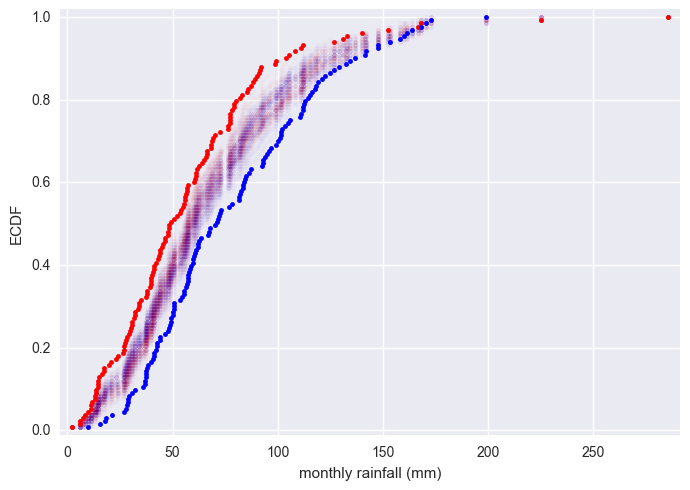

In [86]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.

### 3.2 Test Statistics And p-values
We are testing the null hypothesis that the county level voting is identically distributed between the two states PA and OH.

**Hypothesis testing**  
* Assessment of how reasonable the observed data is assuming a hypothesis is true  
This is a bit vague. What about the data do we assess and how do we quantify the assessment?

**Test statistic**  
* A single number that can be computed from observed data and also from data you simulate under the null hypothesis.  
* It serves as the basis of comparison between the two i.e. what the hypothesis predicts and what we actually observed.  

Importantly, you should choose your test statistic to be something that is pertinent to the question that you are trying to answer with your hypothesis test. In this case - are the two states different?  
If they are identical, they should have the same mean vote share for Obama. So the difference in mean vote share should be zero. We will therefore choose the difference in means as our test statictic.  

**Permutation replicate**  
The value of a test statistic computed from a permutation sample is called a permutation replicate.  
> `np.mean(perm_sample_PA) - np.mean(perm_sample_OH)`  
> 1.12 `#permutation replicate`  
> `np.mean(dem_share_PA) - np.mean(dem_share_OH) # orig data`  
> 1.16

So for this permutation replicate, we did not quite get as bog of a difference in means than what was observed in the original data. Now we can redo the election 10000 times under the null hypothesis by generating lots and lots of permutation replicates. 

**Mean vote difference under null hypothesis**  
We can plot a histogram of all the permutation replicates. The difference of means from the elections simulated under the null hypothesis lies somewhere between -4 and 4 %. The actual mean vote % difference was 1.16%. 

**p-value**  
If we tally up the area of the histogram that is to the right of the actual mean, we get that about 23% of the simulated elections had at least a 1.16% difference or greater. This value 0.23 is called a p-value i.e. the probability of getting at least a 1.16% difference in the mean vote share assuming the states have identically distributed voting. So is it plausible that we go the vote share we got had PA and OH been identically distributed? Sure it is. It happened 23% of the times under the null hypothesis. 
* The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true.  
* NOT the probability that the null hypothesis is true.  

The p-value is only meaningful if the null hypothesis is clearly stated along with the test statistis used to evaluate it. 

**Statistical signifance**  
When the p-value is small, it is often said that the data is statistically significantly different than what we would have observed under the null hypothesis. 
* Determined by the smallness of a p-value  

**Null hypothesis significance testing (NHST)**  
* Another name for the hypothesis testing that we are doing  

We should not just label something as statistically significant or not, but rather to consider the value of the p-value as well as how much different the data is from what you would expect under the null hypothesis.  

Statistical significance and practical significance (whether or not the difference of the data from the null hypothesis matters for practical considerations) are two different things. 

#### Generating permutation replicates
A permutation replicate is a single value of a statistic computed from a permutation sample. We will write a function `draw_perm_reps()` to generate permutation replicates.  
The function has call signature `draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, `func` must be a function that takes two arrays as arguments. In most circumstances, `func` will be a function we write ourselves.

In [87]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

#### Look before you leap: EDA before hypothesis testing
Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. 
But, let's do EDA first. We will make a bee swarm plot for the data. They are stored in a Pandas data frame, `df`, where column `ID` is the identity of the frog and column `impact_force` is the impact force in Newtons (N).

In [88]:
# Data
#Int64Index([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
#            37, 38, 39, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
#            74, 75, 76, 77, 78, 79],
#           dtype='int64')
index = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 
         70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

ID = ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B',
 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']

impact_force = [1.6120000000000001, 0.60499999999999998, 0.32700000000000001, 0.94599999999999995, 0.54100000000000004,
 1.5389999999999999, 0.52900000000000003, 0.628, 1.4530000000000001, 0.29699999999999999, 0.70299999999999996,
 0.26900000000000002, 0.751, 0.245, 1.1819999999999999, 0.51500000000000001, 0.435, 0.38300000000000001, 0.45700000000000002,
 0.72999999999999998, 0.17199999999999999, 0.14199999999999999, 0.036999999999999998, 0.45300000000000001, 0.35499999999999998,
 0.021999999999999999, 0.502, 0.27300000000000002, 0.71999999999999997, 0.58199999999999996, 0.19800000000000001,
 0.19800000000000001, 0.59699999999999998, 0.51600000000000001, 0.81499999999999995, 0.40200000000000002,
 0.60499999999999998, 0.71099999999999997, 0.61399999999999999, 0.46800000000000003]

df = pd.DataFrame(data=ID, index=index, columns=["ID"])
df["impact_force"] = impact_force
print(df)
print(df.info())

   ID  impact_force
20  A         1.612
21  A         0.605
22  A         0.327
23  A         0.946
24  A         0.541
25  A         1.539
26  A         0.529
27  A         0.628
28  A         1.453
29  A         0.297
30  A         0.703
31  A         0.269
32  A         0.751
33  A         0.245
34  A         1.182
35  A         0.515
36  A         0.435
37  A         0.383
38  A         0.457
39  A         0.730
60  B         0.172
61  B         0.142
62  B         0.037
63  B         0.453
64  B         0.355
65  B         0.022
66  B         0.502
67  B         0.273
68  B         0.720
69  B         0.582
70  B         0.198
71  B         0.198
72  B         0.597
73  B         0.516
74  B         0.815
75  B         0.402
76  B         0.605
77  B         0.711
78  B         0.614
79  B         0.468
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 20 to 79
Data columns (total 2 columns):
ID              40 non-null object
impact_force    40 non-null float64
dtypes

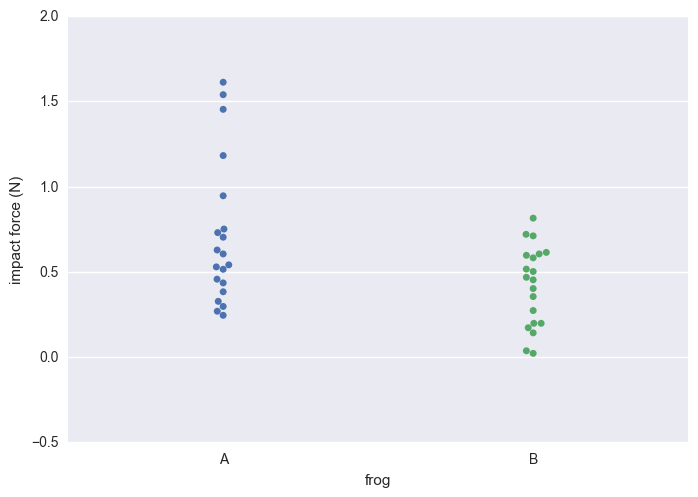

In [89]:
# Make bee swarm plot
sns.swarmplot(x="ID", y="impact_force", data=df)

# Label axes
plt.xlabel('frog')
plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

#### Permutation test on frog data
The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. We will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

The data has been stored in the arrays force_a and force_b.

In [90]:
# Data
force_a = df[df["ID"] == "A"]["impact_force"]
print(force_a)
force_b = df[df["ID"] == "B"]["impact_force"]
print(force_b)

20    1.612
21    0.605
22    0.327
23    0.946
24    0.541
25    1.539
26    0.529
27    0.628
28    1.453
29    0.297
30    0.703
31    0.269
32    0.751
33    0.245
34    1.182
35    0.515
36    0.435
37    0.383
38    0.457
39    0.730
Name: impact_force, dtype: float64
60    0.172
61    0.142
62    0.037
63    0.453
64    0.355
65    0.022
66    0.502
67    0.273
68    0.720
69    0.582
70    0.198
71    0.198
72    0.597
73    0.516
74    0.815
75    0.402
76    0.605
77    0.711
78    0.614
79    0.468
Name: impact_force, dtype: float64


In [91]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0058


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant,", but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

### 3.3 Bootstrap Hypothesis Tests

Let's go over the pipeline of hypothesis testing. 

**Pipeline for hypothesis testing**  
* Clearly state the null hypothesis (_Stating the null hypothesis so that it is crystal clear is essential to simulate it_)  
* Define your test statistic  
* Generate many sets of simulated data assuming the null hypothesis is true  
* Compute the test statistic for each simulated data set  
* The p-value is then the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data.  

**Michelson and Newcomb: speed of light pioneers **  
Let's do another hypothesis test. Consider Michelson's measurements of the speed of light. His future collaborator Simon Newcomb also measured the speed of light. Newcomb's measurements had a mean of 299,860 km/s differing from Michelson's by about 8 km/s. We want to know if there's something fundamentally different about Newcomb's and Michelson's experiments. We only have Newcomb's mean and none of his data points. The question is - could Michelson have gotten the data set he did if the true mean speed of light in his experiments was equal to Newcomb's? 

**Null hypothesis**  
So we formally state our hypothesis as this:
* The true mean speed of light in Michelson's experiment was actually Newcomb's reported mean.  

By the true mean speed of light in Michelson's experiment, we mean the mean Michelson would have gotten had he done his experiment lots and lots of times.  

Because we are comparing a dataset with a value, a permutation test is not applicable. We need to simulate the situation in which the true mean speed of light in Michelson's experiments is Newcomb's value.  

**Shifting the Michelson data**  
To achieve this, we shift Michelson's data such that its mean now matches Newcomb's value. 
> `michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value`  

Plot the ECDF of the shifted data relative to the original data. We can use bootstrapping on this shifted data to simulate data acquisition under the null hypothesis.  

**Calculating the test statistic**  
The test statistic is the mean of the bootstrap sample minus Newcomb's value. We write a function `diff_from_newcomb` to compute it and compute the observed test statistic.  
> `def diff_from_newcomb(data, newcomb_value = 299860):`  
> `return np.mean(data) - newcomb_value`  
>  
> `diff_obs = diff_from_newcomb(michelson_sppe_of_light)`  
> `-7.5999`  

**Computing the p-value**  
We then use `draw_bs_reps` to generate the bootstrap replicates which is the value of the test statistic computed from a bootstrap sample. Note that we pass the shifted Michelson's measurements to the function. The p-value if the fraction of bootstrap replicates that are less than the test statistic.  
> `bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)`  
> `p_value = np.sum(bs_replicates <= diff_observed) / 10000`  
> `p_value`  
> `0.16`  

This suggests that it is quite possible that Newcomb and Michelson did not really have fundamental differences in their measurements.  

**One sample test**  
This is an example of a one sample test.  
* Compare one set of data to a single number  

**Two sample test**  
* Compare two sets of data  

#### A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and we want to see if Frog B and Frog C have similar impact forces. Unfortunately, we do not have Frog C's impact forces available, but we know they have a mean of 0.55 N. Because we don't have the original data, we cannot do a permutation test, and we cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. We will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, we will take the mean as our test statistic. Remember, our goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. We first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [92]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0046


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

#### A bootstrap test for identical distributions
We can do two sample tests. We can even test the same hypothesis that we tested with a permutation test: that the Frog A and Frog B have identically distributed impact forces. To do this test on two arrays with `n1` and `n2` entries, we do a very similar procedure as a permutation test. We concatenate the arrays, generate a bootstrap sample from it, and take the first `n1` entries of the bootstrap sample as belonging to the first data set and the last `n2` as belonging to the second. We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for which the test statistic is less than what was observed.

Now, we will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

**Null hypothesis** - Frog A and Frog B have identical  distributions of impact forces  
**test statistic** - difference of means  
**p-value** - number of bootstrap replicates for which the test statistic is less than what was observed  

In [93]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0053


We got p = 0.0063 from the permutation test, and here we got p = 0.0055. These are very close, and indeed the tests are testing the same thing. However, the permutation test exactly simulates the null hypothesis that the data come from the same distribution, whereas the bootstrap test approximately simulates it. As we will see, though, the bootstrap hypothesis test, while approximate, is more versatile.

#### A two-sample bootstrap hypothesis test for difference of means.
We performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

**null hypothesis** - Frog A and Frog B have the same mean impact force, but not necessarily the same distribution  
**test statistic** - difference in means  
**p-value** - fraction of replicates with a difference in means greater than or equal to what was observed  

In [94]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays such that mean of each is the mean of the concatenated array
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates > diff_of_means(force_a, force_b)) / 10000
print('p-value =', p)

p-value = 0.0036


Not surprisingly, the more forgiving hypothesis, only that the means are equal as opposed to having identical distributions, gives a higher p-value. Again, it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or the distribution of impact forces?

## 4. Hypothesis test examples

### 4.1 A/B Testing
Imagine your company has proposed a redesign of the splash page of its website. They are interested in how many more users click through to the website for the redesign versus the original design. 

**Is your redesign effective?**  
You design a test. Take a set of 1000 vistors to the site and direct 500 of them to the original splash page and 500 of them to the redesigned one. You determine whether or not each of them clicks through to the rest of the website. On the original page A, 45 visitors clicked through. And on the redesigned page B, 67 visitors clicked through. This is almost a 50% increase in the click-through rate. But maybe there really is no difference between the effect of the two designs on the click-through rate and the difference you saw is due to random chance. You want to check. What is the probability that you would observe at least the observed difference in number of clicks-through if that were the case? 

**Null hypothesis**  
This is exactly the question you can address with a hypothesis test. A permutation choice is a good choice here because you can simulate the result as if the redesign had no effect on the click-through rate. 
* The click-through rate is not affected by the redesign  

**Permutation tests of clicks through**  
For each splash page design, we have a numpy array which contains 1 or 0 values for whether or not the visitor clicked through. Next we need to define a function `diff_frac` for our test statistic. Ours is the difference in fraction of visitors who click through. We can compute the fraction who clicked through by summing the entries in the arrays of 1s and 0s and then dividing by the number of entries. Finally we compute the observed value of the test statistic using this function `diff_frac`.  

> `def diff_frac(data_A, data_B):`  
> `frac_A = np.sum(data_A) / len(data_A)`  
> `frac_B = np.sum(data_B) / len(data_B)`  
> `return frac_B - frac_A`  

> `diff_frac_obs = diff_frac(clickthrough_A, clickthrough_B)`  

**Permutation test of clicks through**  
Now we can generate our permutation replicates of the test statistic using the `permutation_replicate` function. We will generate 10000 replicates. We compute the p-value as the number of replicates where the test statistic was at least as great as what we observed. If p-value is small (e.g. 0.016), we might think that the redesign is an improvement.  
> `perm_replicates = np.empty(10000)`  

> `for i in range(10000):`  
> `perm_replicates[i] = permutation_replicate(clickthrough_A, clickthrough_B, diff_frac)`  

> `p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000`  

> `p_value`  
> `0.016`  

**A/B Test**  
This is an example of an A/B test.
* Used by organizations to see if a change in strategy gives a better result  

**Null hypothesis of an A/B test**  
* The test statistic is impervious to the change  

A low p-value implies that the change in strategy led to a change in performance.  

Once again, be warned that statistical significance does not mean practical significance. A difference in click-through rate may be statistically significant but if it is only a couple people per day, your marketing team may not consider the change worth the cost.  

A/B testing is just a special case of the hypothesis testing framework.

#### The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yay. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, we will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. We will use the fraction of Democrats voting in favor as our test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, we will permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yay.

**null hypothesis** - the party of a House member has no bearing on his or her vote  
**test statistic** - the fraction of Democrats voting in favor  
**p-value** - the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244  

In [95]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    """Compute fraction of Democrat yay votes."""
    frac = np.sum(dems) / (len(dems))
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

#### A time-on-website analog
It turns out that we already did a hypothesis test analogous to an A/B test where we are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that is actually a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem we will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as our test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where "nht" is meant to stand for "no-hitter time."

**null hypothesis** - the rule changes resulted in no change in rate of no-hitters (i.e. average time between no-hitters remained the same)  
**test statistic** - the difference in mean inter-no-hitter time  
**p-value** - the probability of observing a difference in mean inter-no-hitter times at least as small as the observed difference in mean inter-no-hitter time   

In [96]:
# Data
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372, 81,  191,  355,  180,  286,   47,  269,  
                     361,  173,  246,  492, 462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77, 271,  563, 3365,
                     89,    0,  379,  221,  479,  367,  628,  843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
                     715, 966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104, 1309,  429,   62, 1878, 1104,  123,
                     251,   93,  188,  983,  166, 96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308, 1114,  813,
                     887])

nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [97]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =',p)

p-val = 0.0001


Our p-value is 0.0001, which means that only one out of our 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, we could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

### 4.2 Test Of Correlation

The pearson correlation coefficient is a measure of how much of the variability in two variables is due to them being correlated. It ranges from -1 for negatively correlated to +1 for positively correlated.  

How can we be sure of a correlation is related or if it could have happened just by chance? We can do a hypothesis test.  

**Hypothesis test of correlation**  
* Posit null hypothesis: the two variables are completely uncorrelated (_Example: Null hypothesis that Obama's vote share and total votes are completely correlated_)  
* Simulate data assuming null hypothesis is true  (_simulate the election assuming the null hypothesis is true_)  
* Use pearson correlation as test statistic  
* Compute p-value as fraction of replicates that have pearson correlation at least as large as observed  

Out of 10000 replicates, not one had a pearson correlation of 0.54. This does not mean that the p-value is 0. It means we would have to generate an enormous number of replicants to have even one that has a test statistic sufficiently extreme. We conclude that the p-value is very very small and there is essentially no doubt that counties with higher vote count tended to vote for Obama.

#### Simulating a null hypothesis concerning correlation
The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. We will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is the best way to to do it?

**Possible Answers**
* Choose 162 random numbers to represent the illiteracy rate and 162 random numbers to represent the corresponding fertility rate.  
_If you just randomly choose numbers, they have nothing at all to do with the measured data._  


* Do a pairs bootstrap: Sample pairs of observed data with replacement to generate a new set of (illiteracy, fertility) data.  
_Pairs bootstrap will get you a confidence interval on the Pearson correlation. You can get a confidence interval for its value. You would find, for example, that it cannot be close to zero. But this is not a simulation of the null hypothesis._  


* Do a bootstrap sampling in which you sample 162 illiteracy values with replacement and then 162 fertility values with replacement.  
_This works and is a legitimate way to simulate the data. The pairings are now random. However, it is not preferred because it is not exact like a permutation test is._  


* Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.  
_Yes, this exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled._  


* Do a permutation test: Permute both the illiteracy and fertility values to generate a new set of (illiteracy, fertility data).  
_This works perfectly, and is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled. However, it is computationally inefficient not necessary to permute both illiteracy and fertility._  

#### Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. We will test this hypothesis. To do so, we will permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, we will compute the Pearson correlation coefficient and assess how many of our permutation replicates have a Pearson correlation coefficient greater than the observed one.



In [98]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


We got a p-value of zero. In hacker statistics, this means that our p-value is very low, since we never got a single replicate in the 10,000 we took that had a Pearson correlation greater than the observed one. We could try increasing the number of replicates we take to continue to move the upper bound on our p-value lower and lower.

#### Do neonicotinoid insecticides have unintended consequences?
We will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. We will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array `control`) and bees treated with pesticide (stored in the Numpy array `treated`).

In [99]:
# Data
control = np.array([  4.159234,   4.408002,   0.172812,   3.498278,   3.104912,
         5.164174,   6.615262,   4.633066,   0.170408,   2.65    ,
         0.0875  ,   1.997148,   6.92668 ,   4.574932,   3.896466,
         5.209814,   3.70625 ,   0.      ,   4.62545 ,   3.01444 ,
         0.732652,   0.4     ,   6.518382,   5.225   ,   6.218742,
         6.840358,   1.211308,   0.368252,   3.59937 ,   4.212158,
         6.052364,   2.115532,   6.60413 ,   5.26074 ,   6.05695 ,
         6.481172,   3.171522,   3.057228,   0.218808,   5.215112,
         4.465168,   2.28909 ,   3.732572,   2.17087 ,   1.834326,
         6.074862,   5.841978,   8.524892,   4.698492,   2.965624,
         2.324206,   3.409412,   4.830726,   0.1     ,   0.      ,
         4.101432,   3.478162,   1.009688,   4.999296,   4.32196 ,
         0.299592,   3.606032,   7.54026 ,   4.284024,   0.057494,
         6.036668,   2.924084,   4.150144,   1.256926,   4.666502,
         4.806594,   2.52478 ,   2.027654,   2.52283 ,   4.735598,
         2.033236,   0.      ,   6.177294,   2.601834,   3.544408,
         3.6045  ,   5.520346,   4.80698 ,   3.002478,   3.559816,
         7.075844,  10.      ,   0.139772,   6.17171 ,   3.201232,
         8.459546,   0.17857 ,   7.088276,   5.496662,   5.415086,
         1.932282,   3.02838 ,   7.47996 ,   1.86259 ,   7.838498,
         2.242718,   3.292958,   6.363644,   4.386898,   8.47533 ,
         4.156304,   1.463956,   4.533628,   5.573922,   1.29454 ,
         7.547504,   3.92466 ,   5.820258,   4.118522,   4.125   ,
         2.286698,   0.591882,   1.273124,   0.      ,   0.      ,
         0.      ,  12.22502 ,   7.601604,   5.56798 ,   1.679914,
         8.77096 ,   5.823942,   0.258374,   0.      ,   5.899236,
         5.486354,   2.053148,   3.25541 ,   2.72564 ,   3.364066,
         2.43427 ,   5.282548,   3.963666,   0.24851 ,   0.347916,
         4.046862,   5.461436,   4.066104,   0.      ,   0.065   ])

treated = np.array([ 1.342686,  1.058476,  3.793784,  0.40428 ,  4.528388,  2.142966,
        3.937742,  0.1375  ,  6.919164,  0.      ,  3.597812,  5.196538,
        2.78955 ,  2.3229  ,  1.090636,  5.323916,  1.021618,  0.931836,
        2.78    ,  0.412202,  1.180934,  2.8674  ,  0.      ,  0.064354,
        3.008348,  0.876634,  0.      ,  4.971712,  7.280658,  4.79732 ,
        2.084956,  3.251514,  1.9405  ,  1.566192,  0.58894 ,  5.219658,
        0.977976,  3.124584,  1.297564,  1.433328,  4.24337 ,  0.880964,
        2.376566,  3.763658,  1.918426,  3.74    ,  3.841726,  4.69964 ,
        4.386876,  0.      ,  1.127432,  1.845452,  0.690314,  4.185602,
        2.284732,  7.237594,  2.185148,  2.799124,  3.43218 ,  0.63354 ,
        1.142496,  0.586   ,  2.372858,  1.80032 ,  3.329306,  4.028804,
        3.474156,  7.508752,  2.032824,  1.336556,  1.906496,  1.396046,
        2.488104,  4.759114,  1.07853 ,  3.19927 ,  3.814252,  4.275962,
        2.817056,  0.552198,  3.27194 ,  5.11525 ,  2.064628,  0.      ,
        3.34101 ,  6.177322,  0.      ,  3.66415 ,  2.352582,  1.531696])

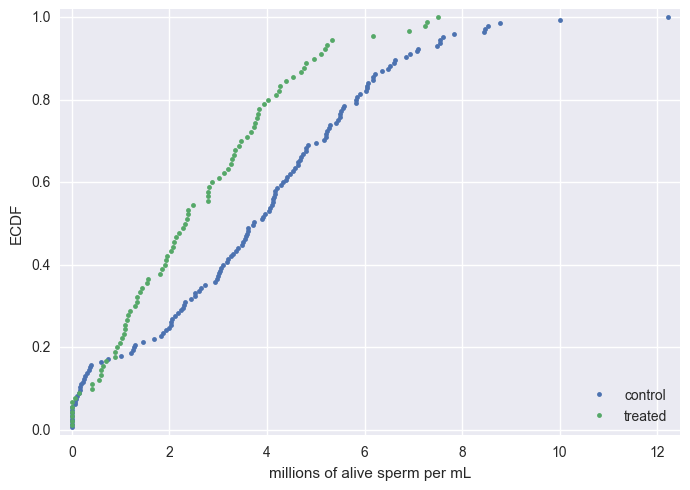

In [100]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

#### Bootstrap hypothesis test on bee sperm counts
Now, we will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. We will use the difference of means as your test statistic.  

**null hypothesis** - male bees treated with neonicotinoid insecticide have the same mean active sperm per milliliter of semen than do untreated male bees  
**test statistic** - difference of mean sperm counts   
**p-value** - probability of observing a difference in mean sperm counts at least as small as the observed difference in mean sperm counts

In [101]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


The p-value is small, most likely less than 0.0001, since we never saw a bootstrap replicated with a difference of means at least as extreme as what was observed.

## 5. Case Study

### 5.1 Finch Beaks And The Need For Statistics

**Your well-equipped toolbox**  
You are now carrying a well stocked toolbox. You know how to take a dataset and explore it. You know how to think probabilistically and infer values and confidence intervals about parameters. You know how to formulate a hypothesis and use your data in Python to test it.
* Graphical and quantitative EDA
* Parameter estimation
* Confidence interval calculation
* Hypothesis testing

Many of the important observations that led Charles Darwin to develop the theory of evolution were made in the Galapagos archipelago, particularly in the study of small birds called finches that inhabit them. The islands are ideal for studying evolution because they are isolated. So they do not have complicated effects from interactions with other species including humans. Furthermore, some of them are small, so entire populations can be monitored on a given island. Every year since 1973, Peter and Rosemary Grant of Princeton University have been spending several months of the year on the tiny volcanic cindercone island of Daphne Major in the Galapagos. This island has two dominant ground finch species - Geospiza fortis and Geospiza scandens. The Grants have monitored them every year, tagging them, making physiological measurements, taking samples for genetic sequencing and more. 

**Our data source**  
In 2014, they published a book entitled:
* 40 Years of Evolution: Darwin's finches on Daphne Major Island
* Data acquired from [Dryad Digital Repository](https://datadryad.org/resource/doi:10.5061/dryad.g6g3h)

**The dimensions of the finch beak**  
We will work with the Grants' measurements of beak length and beak depth. We will consider different aspects of the beak geometry including how it varies over time from species to species and from parents to offspring. 

**Investigation of _G. scandens_ beak depth**  
We will investigate how the beak depth of G. scandens has changed over time. 
* EDA of beak depths in 1975 and 2012
* Parameter estimates with confidence intervals of mean beak depth
* Hypothesis test: did the beaks get deeper?

#### EDA of beak depths of Darwin's finches
We will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

We will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

The units of beak depth are millimeters (mm).

In [102]:
# Data
beak_depth_list = [8.4,  8.8, 8.4, 8.0, 7.9, 8.9, 8.6, 8.5, 8.9, 9.1, 8.6, 9.8, 8.2, 9.0, 9.7, 8.6, 8.2, 9.0, 8.4, 8.6, 8.9,
 9.1, 8.3, 8.7, 9.6, 8.5, 9.1, 9.0, 9.2, 9.9, 8.6, 9.2, 8.4, 8.9, 8.5, 10.4, 9.6, 9.1, 9.3, 9.3, 8.8, 8.3, 8.8, 9.1, 10.1, 8.9,
 9.2, 8.5, 10.2, 10.1, 9.2, 9.7, 9.1, 8.5, 8.2, 9.0, 9.3, 8.0, 9.1, 8.1, 8.3, 8.7, 8.8, 8.6, 8.7, 8.0, 8.8, 9.0, 9.1, 9.74, 9.1,
 9.8, 10.4, 8.3, 9.44, 9.04, 9.0, 9.05, 9.65, 9.45, 8.65, 9.45, 9.45, 9.05, 8.75, 9.45, 8.35, 9.4, 8.9, 9.5, 11.0, 8.7, 8.4,
 9.1, 8.7, 10.2, 9.6, 8.85, 8.8, 9.5, 9.2, 9.0, 9.8, 9.3, 9.0, 10.2, 7.7, 9.0, 9.5, 9.4, 8.0, 8.9, 9.4, 9.5, 8.0, 10.0, 8.95,
 8.2, 8.8, 9.2, 9.4, 9.5, 8.1, 9.5, 8.4, 9.3, 9.3, 9.6, 9.2, 10.0, 8.9, 10.5, 8.9, 8.6, 8.8, 9.15, 9.5, 9.1, 10.2, 8.4, 10.0,
 10.2, 9.3, 10.8, 8.3, 7.8, 9.8, 7.9, 8.9, 7.7, 8.9, 9.4, 9.4, 8.5, 8.5, 9.6, 10.2, 8.8, 9.5, 9.3, 9.0, 9.2, 8.7, 9.0, 9.1,
 8.7, 9.4, 9.8, 8.6, 10.6, 9.0, 9.5, 8.1, 9.3, 9.6, 8.5, 8.2, 8.0, 9.5, 9.7, 9.9, 9.1, 9.5, 9.8, 8.4, 8.3, 9.6, 9.4, 10.0, 8.9,
 9.1, 9.8, 9.3, 9.9, 8.9, 8.5, 10.6, 9.3, 8.9, 8.9, 9.7, 9.8, 10.5, 8.4, 10.0, 9.0, 8.7, 8.8, 8.4, 9.3, 9.8, 8.9, 9.8, 9.1]

year_list = [1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
 1975, 1975, 1975, 1975, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
 2012, 2012, 2012, 2012, 2012]

import pandas as pd
import numpy as np
#beak_depths = pd.DataFrame(data=ID, index=index, columns=["ID"])
beak_depths = pd.DataFrame({'year':year_list, 'beak_depth':beak_depth_list})
print(beak_depths.head())
print(beak_depths.info())

   beak_depth  year
0         8.4  1975
1         8.8  1975
2         8.4  1975
3         8.0  1975
4         7.9  1975
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
beak_depth    214 non-null float64
year          214 non-null int64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB
None


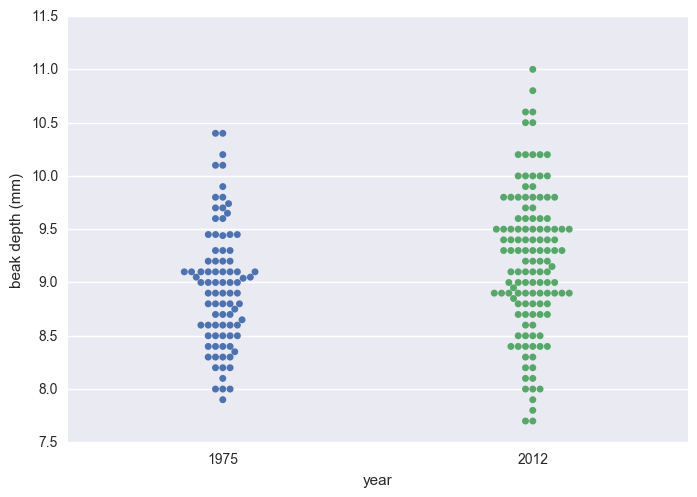

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Create bee swarm plot
sns.swarmplot(x="year", y="beak_depth", data=beak_depths)

# Label the axes
plt.xlabel('year')
plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

#### ECDFs of beak depths
While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

For your convenience, the beak depths for the respective years has been stored in the NumPy arrays bd_1975 and bd_2012.

In [104]:
# store beak depths for the respective years NumPy arrays bd_1975 and bd_2012
bd_1975 = np.array(beak_depths[beak_depths["year"] == 1975]["beak_depth"])
bd_2012 = np.array(beak_depths[beak_depths["year"] == 2012]["beak_depth"])

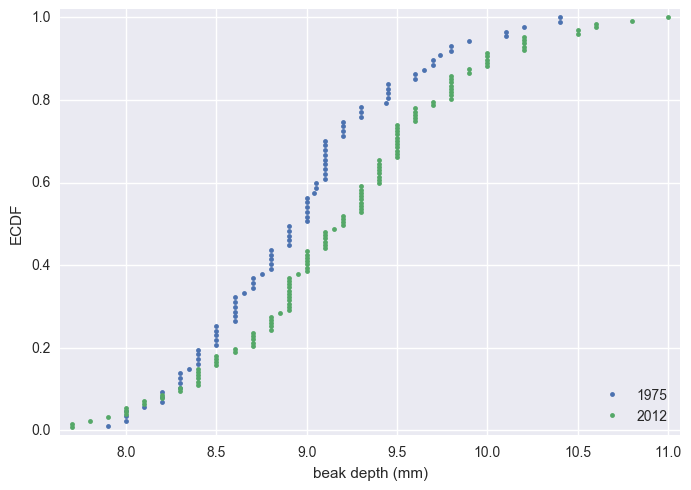

In [105]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

#### Parameter estimates of beak depths
Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

Since in this exercise you will use the draw_bs_reps() function you wrote in chapter 2, it may be helpful to refer back to it.

In [106]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, ([2.5, 97.5]))

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.226220472441 mm
95% confidence interval = [ 0.05882772  0.39280654] mm


#### Hypothesis test: Are beaks deeper in 2012?
Our plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

The hypothesis we are testing is **not** that the beak depths come from the same distribution. For that we could use a permutation test. **The hypothesis is that the means are equal**. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [107]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0034


We get a p-value of 0.0033, which suggests that there is a statistically significant difference. But it is very important to know how different they are. We got a difference of 0.2 mm between the means. We should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### 5.2 Variation Of Beak Shapes
We just determined that the beak depth of G. scandens changed over the course of 37 years. There are few hypotheses as to why this is the case. One reason may be a drought in 1976 and 1977 that resulted in the deaths of plants that produced small seeds on the island. The larger seeds required deeper beads to crack them. So large beaked birds survived and reproduced. If this is the case, it stands to reason that the length of the beak might also change over time. Importantly, if the length and depth change at the same rate, the beak has the same shape. It just got bigger. But if the relationship of beak length and beak depth changed differently, the shape of the beak also changes. 

We will investigate how beak length and depth change together.

#### EDA of beak length and depth
Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.
Store the beak length data as `bl_1975` and `bl_2012`, again with units of millimeters (mm).

In [108]:
# Data
bl_1975 = np.array([ 13.9 ,  14.  ,  12.9 ,  13.5 ,  12.9 ,  14.6 ,  13.  ,  14.2 , 
        14.  ,  14.2 ,  13.1 ,  15.1 ,  13.5 ,  14.4 ,  14.9 ,  12.9 ,
        13.  ,  14.9 ,  14.  ,  13.8 ,  13.  ,  14.75,  13.7 ,  13.8 ,
        14.  ,  14.6 ,  15.2 ,  13.5 ,  15.1 ,  15.  ,  12.8 ,  14.9 ,
        15.3 ,  13.4 ,  14.2 ,  15.1 ,  15.1 ,  14.  ,  13.6 ,  14.  ,
        14.  ,  13.9 ,  14.  ,  14.9 ,  15.6 ,  13.8 ,  14.4 ,  12.8 ,
        14.2 ,  13.4 ,  14.  ,  14.8 ,  14.2 ,  13.5 ,  13.4 ,  14.6 ,
        13.5 ,  13.7 ,  13.9 ,  13.1 ,  13.4 ,  13.8 ,  13.6 ,  14.  ,
        13.5 ,  12.8 ,  14.  ,  13.4 ,  14.9 ,  15.54,  14.63,  14.73,
        15.73,  14.83,  15.94,  15.14,  14.23,  14.15,  14.35,  14.95,
        13.95,  14.05,  14.55,  14.05,  14.45,  15.05,  13.25])

bl_2012 = np.array([ 14.3 ,  12.5 ,  13.7 ,  13.8 ,  12.  ,  13.  ,  13.  ,  13.6 ,
        12.8 ,  13.6 ,  12.95,  13.1 ,  13.4 ,  13.9 ,  12.3 ,  14.  ,
        12.5 ,  12.3 ,  13.9 ,  13.1 ,  12.5 ,  13.9 ,  13.7 ,  12.  ,
        14.4 ,  13.5 ,  13.8 ,  13.  ,  14.9 ,  12.5 ,  12.3 ,  12.8 ,
        13.4 ,  13.8 ,  13.5 ,  13.5 ,  13.4 ,  12.3 ,  14.35,  13.2 ,
        13.8 ,  14.6 ,  14.3 ,  13.8 ,  13.6 ,  12.9 ,  13.  ,  13.5 ,
        13.2 ,  13.7 ,  13.1 ,  13.2 ,  12.6 ,  13.  ,  13.9 ,  13.2 ,
        15.  ,  13.37,  11.4 ,  13.8 ,  13.  ,  13.  ,  13.1 ,  12.8 ,
        13.3 ,  13.5 ,  12.4 ,  13.1 ,  14.  ,  13.5 ,  11.8 ,  13.7 ,
        13.2 ,  12.2 ,  13.  ,  13.1 ,  14.7 ,  13.7 ,  13.5 ,  13.3 ,
        14.1 ,  12.5 ,  13.7 ,  14.6 ,  14.1 ,  12.9 ,  13.9 ,  13.4 ,
        13.  ,  12.7 ,  12.1 ,  14.  ,  14.9 ,  13.9 ,  12.9 ,  14.6 ,
        14.  ,  13.  ,  12.7 ,  14.  ,  14.1 ,  14.1 ,  13.  ,  13.5 ,
        13.4 ,  13.9 ,  13.1 ,  12.9 ,  14.  ,  14.  ,  14.1 ,  14.7 ,
        13.4 ,  13.8 ,  13.4 ,  13.8 ,  12.4 ,  14.1 ,  12.9 ,  13.9 ,
        14.3 ,  13.2 ,  14.2 ,  13.  ,  14.6 ,  13.1 ,  15.2 ])

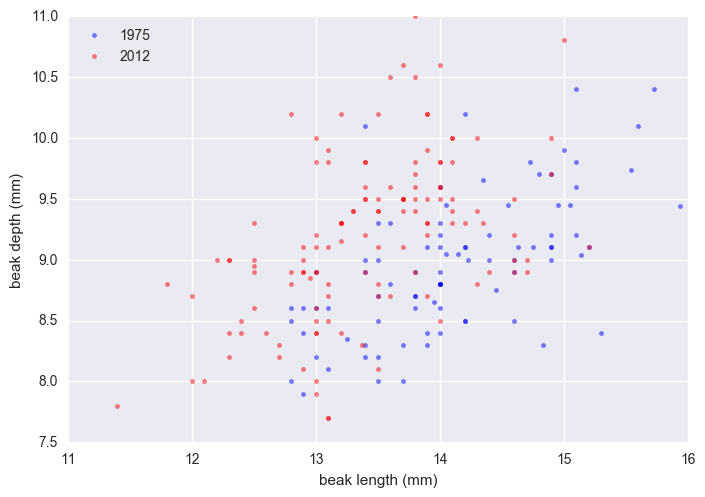

In [114]:
# Make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

We see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

#### Linear regressions
We will perform a linear regression for both the 1975 and 2012 data. Then, we will perform pairs bootstrap estimates for the regression parameters and report 95% confidence intervals on the slope and intercept of the regression line.

In [118]:
# Compute the linear regressions
intercept_1975, slope_1975 = poly.polyfit(bl_1975, bd_1975, 1)
intercept_2012, slope_2012 = poly.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, ([2.5, 97.5]))
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, ([2.5, 97.5]))
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, ([2.5, 97.5]))
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, ([2.5, 97.5]))

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)


1975: slope = 0.465205169161 conf int = [ 0.32703887  0.59418917]
1975: intercept = 2.39087523658 conf int = [ 0.56277948  4.33292104]
2012: slope = 0.462630358835 conf int = [ 0.33123859  0.59389393]
2012: intercept = 2.97724749824 conf int = [ 1.23025529  4.71137259]


It looks like they have the same slope, but different intercepts.

#### Displaying the linear regression results
Now, we will display our linear regression results on the scatter plot. To do this, we will take the first 100 bootstrap samples (stored in bs_slope_reps_1975, bs_intercept_reps_1975, bs_slope_reps_2012, and bs_intercept_reps_2012) and plot the lines with alpha=0.2 and linewidth=0.5 keyword arguments to plt.plot().

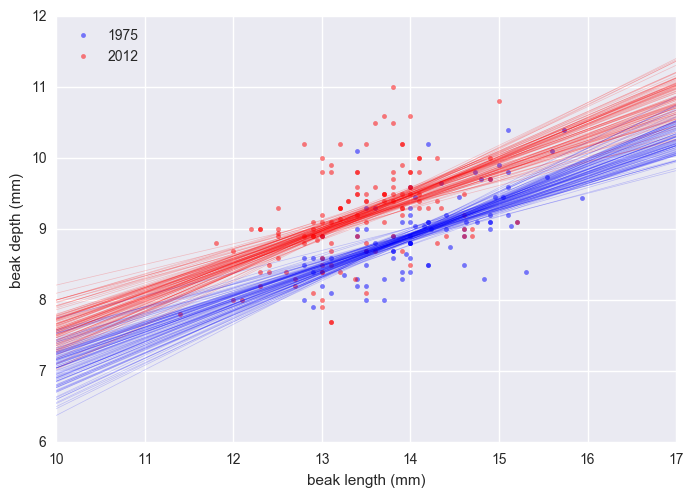

In [119]:
# Make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x , bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

#### Beak length to depth ratio
The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [120]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, ([0.5, 99.5]))
conf_int_2012 = np.percentile(bs_replicates_2012, ([0.5, 99.5]))

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.57888237719 conf int = [ 1.55683274  1.60081398]
2012: mean ratio = 1.46583422768 conf int = [ 1.44339151  1.48723218]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

### 5.3 Calculation Of Heritability
What is causing the beaks of Geospiza scandens to get bigger over time? There was the selective pressure brought on by the drought. But why do some birds have such large beaks to begin with? A prevailing explanation is that scanden birds are mating with the other major finch species on Daphne Major, Geospiza fortis. These hybrid birds then mate with pure scandens in a process called introgressive hybridization which can bring fortis characteristics into the scandens species. This is similar to what likely happened to humans when they encountered Neanderthals. In order to assess the viability of this explanation, we need to know how strongly parental traits are passed on to offspring.

**Heredity**  
* The tendency for parental traits to be inherited to offspring.

We will investigate the extent to which parental beak depth is inherited in opffspring in both scandens and fortis.

#### EDA of heritability
The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species G. scandens. The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. The arrays `bd_parent_fortis` and `bd_offspring_fortis` contain the same information about measurements from G. fortis birds.

We will make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species.

In [124]:
# Data
bd_parent_scandens = np.array([  8.3318,   8.4035,   8.5317,   8.7202,   8.7089,   8.7541,
         8.773 ,   8.8107,   8.7919,   8.8069,   8.6523,   8.6146,
         8.6938,   8.7127,   8.7466,   8.7504,   8.7805,   8.7428,
         8.7164,   8.8032,   8.8258,   8.856 ,   8.9012,   8.9125,
         8.8635,   8.8258,   8.8522,   8.8974,   8.9427,   8.9879,
         8.9615,   8.9238,   8.9351,   9.0143,   9.0558,   9.0596,
         8.9917,   8.905 ,   8.9314,   8.9465,   8.9879,   8.9804,
         9.0219,   9.052 ,   9.0407,   9.0407,   8.9955,   8.9992,
         8.9992,   9.0747,   9.0747,   9.5385,   9.4781,   9.4517,
         9.3537,   9.2707,   9.1199,   9.1689,   9.1425,   9.135 ,
         9.1011,   9.1727,   9.2217,   9.2255,   9.2821,   9.3235,
         9.3198,   9.3198,   9.3198,   9.3273,   9.3725,   9.3989,
         9.4253,   9.4593,   9.4442,   9.4291,   9.2632,   9.2293,
         9.1878,   9.1425,   9.1275,   9.1802,   9.1765,   9.2481,
         9.2481,   9.1991,   9.1689,   9.1765,   9.2406,   9.3198,
         9.3235,   9.1991,   9.2971,   9.2443,   9.316 ,   9.2934,
         9.3914,   9.3989,   9.5121,   9.6176,   9.5535,   9.4668,
         9.3725,   9.3348,   9.3763,   9.3839,   9.4216,   9.4065,
         9.3348,   9.4442,   9.4367,   9.5083,   9.448 ,   9.4781,
         9.595 ,   9.6101,   9.5686,   9.6365,   9.7119,   9.8213,
         9.825 ,   9.7609,   9.6516,   9.5988,   9.546 ,   9.6516,
         9.7572,   9.8854,  10.0023,   9.3914])
bd_offspring_scandens = np.array([  8.419 ,   9.2468,   8.1532,   8.0089,   8.2215,   8.3734,
         8.5025,   8.6392,   8.7684,   8.8139,   8.7911,   8.9051,
         8.9203,   8.8747,   8.943 ,   9.0038,   8.981 ,   9.0949,
         9.2696,   9.1633,   9.1785,   9.1937,   9.2772,   9.0722,
         8.9658,   8.9658,   8.5025,   8.4949,   8.4949,   8.5633,
         8.6013,   8.6468,   8.1532,   8.3734,   8.662 ,   8.6924,
         8.7456,   8.8367,   8.8595,   8.9658,   8.9582,   8.8671,
         8.8671,   8.943 ,   9.0646,   9.1405,   9.2089,   9.2848,
         9.3759,   9.4899,   9.4519,   8.1228,   8.2595,   8.3127,
         8.4949,   8.6013,   8.4646,   8.5329,   8.7532,   8.8823,
         9.0342,   8.6392,   8.6772,   8.6316,   8.7532,   8.8291,
         8.8975,   8.9734,   9.0494,   9.1253,   9.1253,   9.1253,
         9.1785,   9.2848,   9.4595,   9.3608,   9.2089,   9.2544,
         9.3684,   9.3684,   9.2316,   9.1709,   9.2316,   9.0342,
         8.8899,   8.8291,   8.981 ,   8.8975,  10.4089,  10.1886,
         9.7633,   9.7329,   9.6114,   9.5051,   9.5127,   9.3684,
         9.6266,   9.5354,  10.0215,  10.0215,   9.6266,   9.6038,
         9.4063,   9.2316,   9.338 ,   9.262 ,   9.262 ,   9.4063,
         9.4367,   9.0342,   8.943 ,   8.9203,   8.7835,   8.7835,
         9.057 ,   8.9354,   8.8975,   8.8139,   8.8671,   9.0873,
         9.2848,   9.2392,   9.2924,   9.4063,   9.3152,   9.4899,
         9.5962,   9.6873,   9.5203,   9.6646])
bd_parent_fortis = np.array([ 10.1  ,   9.55 ,   9.4  ,  10.25 ,  10.125,   9.7  ,   9.05 ,
         7.4  ,   9.   ,   8.65 ,   9.625,   9.9  ,   9.55 ,   9.05 ,
         8.35 ,  10.1  ,  10.1  ,   9.9  ,  10.225,  10.   ,  10.55 ,
        10.45 ,   9.2  ,  10.2  ,   8.95 ,  10.05 ,  10.2  ,   9.5  ,
         9.925,   9.95 ,  10.05 ,   8.75 ,   9.2  ,  10.15 ,   9.8  ,
        10.7  ,  10.5  ,   9.55 ,  10.55 ,  10.475,   8.65 ,  10.7  ,
         9.1  ,   9.4  ,  10.3  ,   9.65 ,   9.5  ,   9.7  ,  10.525,
         9.95 ,  10.1  ,   9.75 ,  10.05 ,   9.9  ,  10.   ,   9.1  ,
         9.45 ,   9.25 ,   9.5  ,  10.   ,  10.525,   9.9  ,  10.4  ,
         8.95 ,   9.4  ,  10.95 ,  10.75 ,  10.1  ,   8.05 ,   9.1  ,
         9.55 ,   9.05 ,  10.2  ,  10.   ,  10.55 ,  10.75 ,   8.175,
         9.7  ,   8.8  ,  10.75 ,   9.3  ,   9.7  ,   9.6  ,   9.75 ,
         9.6  ,  10.45 ,  11.   ,  10.85 ,  10.15 ,  10.35 ,  10.4  ,
         9.95 ,   9.1  ,  10.1  ,   9.85 ,   9.625,   9.475,   9.   ,
         9.25 ,   9.1  ,   9.25 ,   9.2  ,   9.95 ,   8.65 ,   9.8  ,
         9.4  ,   9.   ,   8.55 ,   8.75 ,   9.65 ,   8.95 ,   9.15 ,
         9.85 ,  10.225,   9.825,  10.   ,   9.425,  10.4  ,   9.875,
         8.95 ,   8.9  ,   9.35 ,  10.425,  10.   ,  10.175,   9.875,
         9.875,   9.15 ,   9.45 ,   9.025,   9.7  ,   9.7  ,  10.05 ,
        10.3  ,   9.6  ,  10.   ,   9.8  ,  10.05 ,   8.75 ,  10.55 ,
         9.7  ,  10.   ,   9.85 ,   9.8  ,   9.175,   9.65 ,   9.55 ,
         9.9  ,  11.55 ,  11.3  ,  10.4  ,  10.8  ,   9.8  ,  10.45 ,
        10.   ,  10.75 ,   9.35 ,  10.75 ,   9.175,   9.65 ,   8.8  ,
        10.55 ,  10.675,   9.95 ,   9.55 ,   8.825,   9.7  ,   9.85 ,
         9.8  ,   9.55 ,   9.275,  10.325,   9.15 ,   9.35 ,   9.15 ,
         9.65 ,  10.575,   9.975,   9.55 ,   9.2  ,   9.925,   9.2  ,
         9.3  ,   8.775,   9.325,   9.175,   9.325,   8.975,   9.7  ,
         9.5  ,  10.225,  10.025,   8.2  ,   8.2  ,   9.55 ,   9.05 ,
         9.6  ,   9.6  ,  10.15 ,   9.875,  10.485,  11.485,  10.985,
         9.7  ,   9.65 ,   9.35 ,  10.05 ,  10.1  ,   9.9  ,   8.95 ,
         9.3  ,   9.95 ,   9.45 ,   9.5  ,   8.45 ,   8.8  ,   8.525,
         9.375,  10.2  ,   7.625,   8.375,   9.25 ,   9.4  ,  10.55 ,
         8.9  ,   8.8  ,   9.   ,   8.575,   8.575,   9.6  ,   9.375,
         9.6  ,   9.95 ,   9.6  ,  10.2  ,   9.85 ,   9.625,   9.025,
        10.375,  10.25 ,   9.3  ,   9.5  ,   9.55 ,   8.55 ,   9.05 ,
         9.9  ,   9.8  ,   9.75 ,  10.25 ,   9.1  ,   9.65 ,  10.3  ,
         8.9  ,   9.95 ,   9.5  ,   9.775,   9.425,   7.75 ,   7.55 ,
         9.1  ,   9.6  ,   9.575,   8.95 ,   9.65 ,   9.65 ,   9.65 ,
         9.525,   9.85 ,   9.05 ,   9.3  ,   8.9  ,   9.45 ,  10.   ,
         9.85 ,   9.25 ,  10.1  ,   9.125,   9.65 ,   9.1  ,   8.05 ,
         7.4  ,   8.85 ,   9.075,   9.   ,   9.7  ,   8.7  ,   9.45 ,
         9.7  ,   8.35 ,   8.85 ,   9.7  ,   9.45 ,  10.3  ,  10.   ,
        10.45 ,   9.45 ,   8.5  ,   8.3  ,  10.   ,   9.225,   9.75 ,
         9.15 ,   9.55 ,   9.   ,   9.275,   9.35 ,   8.95 ,   9.875,
         8.45 ,   8.6  ,   9.7  ,   8.55 ,   9.05 ,   9.6  ,   8.65 ,
         9.2  ,   8.95 ,   9.6  ,   9.15 ,   9.4  ,   8.95 ,   9.95 ,
        10.55 ,   9.7  ,   8.85 ,   8.8  ,  10.   ,   9.05 ,   8.2  ,
         8.1  ,   7.25 ,   8.3  ,   9.15 ,   8.6  ,   9.5  ,   8.05 ,
         9.425,   9.3  ,   9.8  ,   9.3  ,   9.85 ,   9.5  ,   8.65 ,
         9.825,   9.   ,  10.45 ,   9.1  ,   9.55 ,   9.05 ,  10.   ,
         9.35 ,   8.375,   8.3  ,   8.8  ,  10.1  ,   9.5  ,   9.75 ,
        10.1  ,   9.575,   9.425,   9.65 ,   8.725,   9.025,   8.5  ,
         8.95 ,   9.3  ,   8.85 ,   8.95 ,   9.8  ,   9.5  ,   8.65 ,
         9.1  ,   9.4  ,   8.475,   9.35 ,   7.95 ,   9.35 ,   8.575,
         9.05 ,   8.175,   9.85 ,   7.85 ,   9.85 ,  10.1  ,   9.35 ,
         8.85 ,   8.75 ,   9.625,   9.25 ,   9.55 ,  10.325,   8.55 ,
         9.675,   9.15 ,   9.   ,   9.65 ,   8.6  ,   8.8  ,   9.   ,
         9.95 ,   8.4  ,   9.35 ,  10.3  ,   9.05 ,   9.975,   9.975,
         8.65 ,   8.725,   8.2  ,   7.85 ,   8.775,   8.5  ,   9.4  ])
bd_offspring_fortis = np.array([ 10.7 ,   9.78,   9.48,   9.6 ,  10.27,   9.5 ,   9.  ,   7.46,
         7.65,   8.63,   9.81,   9.4 ,   9.48,   8.75,   7.6 ,  10.  ,
        10.09,   9.74,   9.64,   8.49,  10.15,  10.28,   9.2 ,  10.01,
         9.03,   9.94,  10.5 ,   9.7 ,  10.02,  10.04,   9.43,   8.1 ,
         9.5 ,   9.9 ,   9.48,  10.18,  10.16,   9.08,  10.39,   9.9 ,
         8.4 ,  10.6 ,   8.75,   9.46,   9.6 ,   9.6 ,   9.95,  10.05,
        10.16,  10.1 ,   9.83,   9.46,   9.7 ,   9.82,  10.34,   8.02,
         9.65,   9.87,   9.  ,  11.14,   9.25,   8.14,  10.23,   8.7 ,
         9.8 ,  10.54,  11.19,   9.85,   8.1 ,   9.3 ,   9.34,   9.19,
         9.52,   9.36,   8.8 ,   8.6 ,   8.  ,   8.5 ,   8.3 ,  10.38,
         8.54,   8.94,  10.  ,   9.76,   9.45,   9.89,  10.9 ,   9.91,
         9.39,   9.86,   9.74,   9.9 ,   9.09,   9.69,  10.24,   8.9 ,
         9.67,   8.93,   9.3 ,   8.67,   9.15,   9.23,   9.59,   9.03,
         9.58,   8.97,   8.57,   8.47,   8.71,   9.21,   9.13,   8.5 ,
         9.58,   9.21,   9.6 ,   9.32,   8.7 ,  10.46,   9.29,   9.24,
         9.45,   9.35,  10.19,   9.91,   9.18,   9.89,   9.6 ,  10.3 ,
         9.45,   8.79,   9.2 ,   8.8 ,   9.69,  10.61,   9.6 ,   9.9 ,
         9.26,  10.2 ,   8.79,   9.28,   8.83,   9.76,  10.2 ,   9.43,
         9.4 ,   9.9 ,   9.5 ,   8.95,   9.98,   9.72,   9.86,  11.1 ,
         9.14,  10.49,   9.75,  10.35,   9.73,   9.83,   8.69,   9.58,
         8.42,   9.25,  10.12,   9.31,   9.99,   8.59,   8.74,   8.79,
         9.6 ,   9.52,   8.93,  10.23,   9.35,   9.35,   9.09,   9.04,
         9.75,  10.5 ,   9.09,   9.05,   9.54,   9.3 ,   9.06,   8.7 ,
         9.32,   8.4 ,   8.67,   8.6 ,   9.53,   9.77,   9.65,   9.43,
         8.35,   8.26,   9.5 ,   8.6 ,   9.57,   9.14,  10.79,   8.91,
         9.93,  10.7 ,   9.3 ,   9.93,   9.51,   9.44,  10.05,  10.13,
         9.24,   8.21,   8.9 ,   9.34,   8.77,   9.4 ,   8.82,   8.83,
         8.6 ,   9.5 ,  10.2 ,   8.09,   9.07,   9.29,   9.1 ,  10.19,
         9.25,   8.98,   9.02,   8.6 ,   8.25,   8.7 ,   9.9 ,   9.65,
         9.45,   9.38,  10.4 ,   9.96,   9.46,   8.26,  10.05,   8.92,
         9.5 ,   9.43,   8.97,   8.44,   8.92,  10.3 ,   8.4 ,   9.37,
         9.91,  10.  ,   9.21,   9.95,   8.84,   9.82,   9.5 ,  10.29,
         8.4 ,   8.31,   9.29,   8.86,   9.4 ,   9.62,   8.62,   8.3 ,
         9.8 ,   8.48,   9.61,   9.5 ,   9.37,   8.74,   9.31,   9.5 ,
         9.49,   9.74,   9.2 ,   9.24,   9.7 ,   9.64,   9.2 ,   7.5 ,
         7.5 ,   8.7 ,   8.31,   9.  ,   9.74,   9.31,  10.5 ,   9.3 ,
         8.12,   9.34,   9.72,   9.  ,   9.65,   9.9 ,  10.  ,  10.1 ,
         8.  ,   9.07,   9.75,   9.33,   8.11,   9.36,   9.74,   9.9 ,
         9.23,   9.7 ,   8.2 ,   9.35,   9.49,   9.34,   8.87,   9.03,
         9.07,   9.43,   8.2 ,   9.19,   9.  ,   9.2 ,   9.06,   9.81,
         8.89,   9.4 ,  10.45,   9.64,   9.03,   8.71,   9.91,   8.33,
         8.2 ,   7.83,   7.14,   8.91,   9.18,   8.8 ,   9.9 ,   7.73,
         9.25,   8.7 ,   9.5 ,   9.3 ,   9.05,  10.18,   8.85,   9.24,
         9.15,   9.98,   8.77,   9.8 ,   8.65,  10.  ,   8.81,   8.01,
         7.9 ,   9.41,  10.18,   9.55,   9.08,   8.4 ,   9.75,   8.9 ,
         9.07,   9.35,   8.9 ,   8.19,   8.65,   9.19,   8.9 ,   9.28,
        10.58,   9.  ,   9.4 ,   8.91,   9.93,  10.  ,   9.37,   7.4 ,
         9.  ,   8.8 ,   9.18,   8.3 ,  10.08,   7.9 ,   9.96,  10.4 ,
         9.65,   8.8 ,   8.65,   9.7 ,   9.23,   9.43,   9.93,   8.47,
         9.55,   9.28,   8.85,   8.9 ,   8.75,   8.63,   9.  ,   9.43,
         8.28,   9.23,  10.4 ,   9.  ,   9.8 ,   9.77,   8.97,   8.37,
         7.7 ,   7.9 ,   9.5 ,   8.2 ,   8.8 ])
array_list = [bd_parent_scandens, bd_offspring_scandens, bd_parent_fortis, bd_offspring_fortis]
for a in array_list:
    print(type(a), len(a))

<class 'numpy.ndarray'> 130
<class 'numpy.ndarray'> 130
<class 'numpy.ndarray'> 413
<class 'numpy.ndarray'> 413


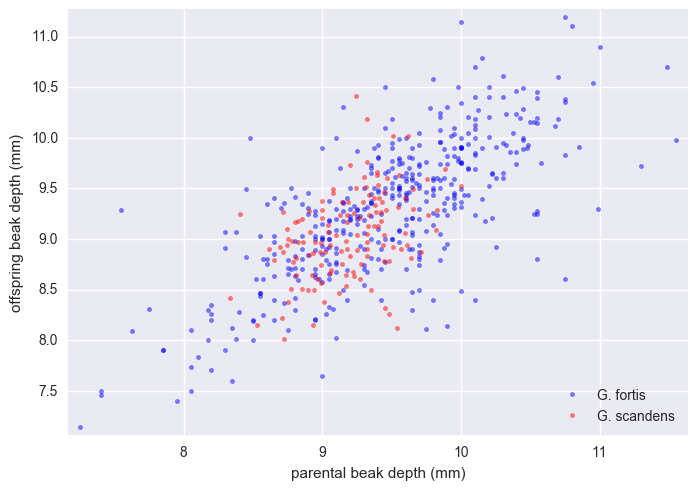

In [125]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

#### Correlation of offspring and parental data
In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

We had already written a function `draw_bs_pairs_linreg()` to do pairs bootstrap to get estimates for parameters derived from linear regression. We will modify this function to make a new function with call signature `draw_bs_pairs(x, y, func, size=1)` that performs pairs bootstrap and computes a single statistic on the pairs samples defined by func(bs_x, bs_y).

In [126]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap and computes a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

#### Pearson correlation of offspring and parental data
The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [127]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, ([2.5, 97.5]))
conf_int_fortis = np.percentile(bs_replicates_fortis, ([2.5, 97.5]))

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


G. scandens: 0.41170636294 [ 0.2707813   0.53823157]
G. fortis: 0.728341239552 [ 0.66993693  0.77944746]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

#### Measuring heritability
The Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, we will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [128]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, ([2.5, 97.5]))
conf_int_fortis = np.percentile(replicates_fortis, ([2.5, 97.5]))

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.548534086869 [ 0.3414305   0.76071303]
G. fortis: 0.722905191144 [ 0.64161867  0.7925203 ]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

#### Is beak depth heritable at all in *G. scandens*?
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. We will test that hypothesis here. To do this, we will do a pairs permutation test.

In [129]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


We get a p-value of zero, which means that none of the 10,000 permutation pairs replicates we drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.

### Summary of Statistical Thinking Skills
* Perform EDA
  * Generate effective plots like ECDF
  * Compute summary statistics
* Estimate parameters
  * By optimization, including linear regression
  * Determine confidence intervals
* Formulate and test hypotheses